### CS231n Convulation Neural Networks for Visual Recognition

In this notebook we demonstrate the explantion given on k-Nearest Neighbour for image classification in lecture 2 of CS231n <http://cs231n.github.io/classification/>

We do below given items, in this notebook

    - Read in CIFAR 10 dataset
    - Visualize it
    - Run Nearest Neighbour Classifier on it
    - We assume, L1 and L2 distance, and k as a hyper-parameter and choose the best hyper-parameter using validation and cross validation technique
    

In [9]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

import os
import cPickle as pickle
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = "/Users/1020382/Documents/MachineLearning/CS221N/cifar-10-batches-py"

- CIFAR10 data contains 
    - 50,000 train images 
    - from 10 classes
    - 10,000 test images
- data is provided 
    - in a pickle file
    - 5 batches of train data (data_batch_{0..5})
    - 1 batch of test data (test_batch)
    - 1 batch of meta data batches.meta
- image is 32 * 32 in size with three color channel
- each image is given as row vector with 32*32*3 = 3072 columns

In [157]:
# function to read the cifar 10 data
def read_cifar10(data_path):
    for i in xrange(5):
        with open(os.path.join(data_path, 'data_batch_' + str(i+1)), 'r') as f:
            data_dict = pickle.load(f)
        if i == 0:
            X_train = data_dict['data']
            y_train = data_dict['labels']
        else:
            X_train = np.vstack((X_train, data_dict['data']))
            y_train = np.vstack((y_train, data_dict['labels']))
    
    with open(os.path.join(data_path, 'test_batch'), 'rb') as t:
        data_dict = pickle.load(t)
    X_test = data_dict['data']
    y_test = data_dict['labels']
    
    with open(os.path.join(data_path, 'batches.meta'), 'r') as f:
        label_names = pickle.load(f)['label_names']
    
    return X_train, y_train.ravel(), X_test, np.array(y_test), label_names

In [158]:
X_train, y_train, X_test, y_test, label_names = read_cifar10(data_path)

Visualize the images
- Each image is row vector with 3072 columns
- So, we need to re-shape it before we can visulaize


In [7]:
# Visualize first 10 images of each class

def visualize_cifar10(X_train, y_train):
    X_train_visualize = X_train.reshape(X_train.shape[0], 3, 32, 32).transpose(0, 2, 3, 1).astype('uint8')
    y_train_visualize = np.array(y_train)
    
    for i in xrange(10):
        print(label_names[i])
        fig, axes = plt.subplots(1, 10, figsize=(10,10))
        image_data = X_train_visualize[np.argwhere(y_train_visualize == i)[:10].ravel()]
        for j in xrange(10):

            axes[j].set_axis_off()
            axes[j].imshow(image_data[j])
        plt.show()

airplane


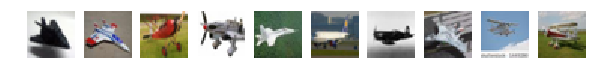

automobile


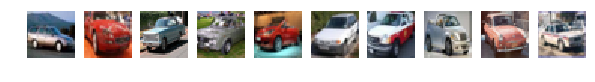

bird


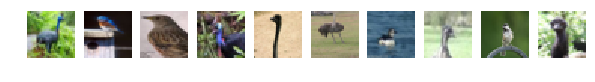

cat


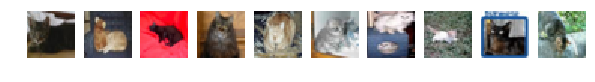

deer


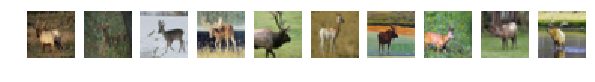

dog


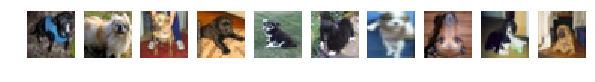

frog


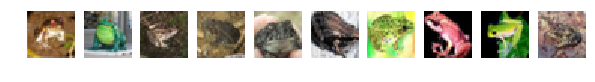

horse


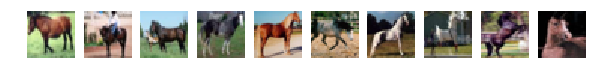

ship


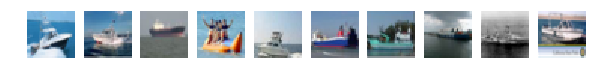

truck


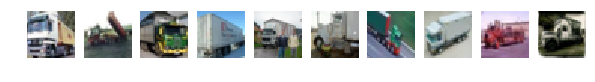

In [8]:
visualize_cifar10(X_train, y_train)

In [164]:
class KNearestNeighbour(BaseEstimator, TransformerMixin):
    
    def __init__(self, distance_measure='L1', k=5):
        
        if distance_measure not in ['L1', 'L2']:
            raise ValueError("Only L1 and L2 distance measures are supported")
            
        self.distance_measure = distance_measure
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        return self
    
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, len(X))
        for i in xrange(len(X)):
            if self.distance_measure is 'L1':
                distance = np.sum(np.abs(self.X - X[i]), axis=1 )
            else:
                distance = np.sum((self.X - X[i])**2, axis=1)
                
            neighbour = np.argsort(distance)[:self.k]
            
            label = self.y[neighbour]
            label = np.bincount(label)
            label = np.argmax(label)
            
            if i == 0:
                k_neighbour = neighbour
                predicted_label = label
            else:
                k_neighbour = np.vstack((k_neighbour, neighbour))
                predicted_label = np.vstack((predicted_label, label))
                
        self.k_neighbour = k_neighbour
        return predicted_label.ravel()

In [163]:
def classification_accuracy(y, y_pred):
    return np.mean(y == y_pred)

In [169]:
# Checking accruacy on randomly selected 100 test images
nn = KNearestNeighbour()
nn.fit(X_train, y_train)

random_index_100 = np.random.randint(0, len(X_test), 100)
y_pred_100 = nn.predict(X_test[random_index_100])
print("Accuracy {0}".format(classification_accuracy(y_test[random_index_100], y_pred_100)))

Accuracy 0.25


Hyper-parameters for k-NN is 'k' and distance matrix

- Running 5-fold cross validation
- trying k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15 and 20
- Testing on randomly choosen 1000 images

- Intially performing validation on last 1000 images

In [199]:
X_valid = X_train[49000:]
y_valid = y_train[49000:]

In [200]:
y_valid.shape

(1000,)

In [192]:
nn = KNearestNeighbour(distance_measure=d, k=k1)
nn.fit(X_train[:49000], y_train[:49000])
pred = nn.predict(X_valid)
classification_accuracy(y_valid, pred)

/Users/1020382/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


0.0

In [202]:
accuracy_dict

{'L1_1': [0.252,
  0.222,
  0.23400000000000001,
  0.23499999999999999,
  0.23599999999999999,
  0.23400000000000001,
  0.23599999999999999,
  0.246,
  0.252,
  0.245,
  0.24199999999999999],
 'L1_15': [0.252,
  0.222,
  0.23400000000000001,
  0.23499999999999999,
  0.23599999999999999,
  0.23400000000000001,
  0.23599999999999999,
  0.246,
  0.252,
  0.245,
  0.24199999999999999],
 'L1_2': [0.252,
  0.222,
  0.23400000000000001,
  0.23499999999999999,
  0.23599999999999999,
  0.23400000000000001,
  0.23599999999999999,
  0.246,
  0.252,
  0.245,
  0.24199999999999999],
 'L1_20': [0.252,
  0.222,
  0.23400000000000001,
  0.23499999999999999,
  0.23599999999999999,
  0.23400000000000001,
  0.23599999999999999,
  0.246,
  0.252,
  0.245,
  0.24199999999999999],
 'L1_3': [0.252,
  0.222,
  0.23400000000000001,
  0.23499999999999999,
  0.23599999999999999,
  0.23400000000000001,
  0.23599999999999999,
  0.246,
  0.252,
  0.245,
  0.24199999999999999],
 'L1_4': [0.252,
  0.222,
  0.23400000

In [198]:
y_valid.shape

(1000, 3072)

In [201]:
k = range(1,10)
k.extend([15, 20])
accuracy_dict = {}

for d in ['L1', 'L2']:
    accuracy = []
    for k1 in k:
        print("Trying distance {0} and k {1}".format(d,k1))
        nn = KNearestNeighbour(distance_measure=d, k=k1)
        nn.fit(X_train[:49000], y_train[:49000])
        pred = nn.predict(X_valid)
        accuracy.append(classification_accuracy(y_valid, pred))
        key =d + "_" + str(k1)
        accuracy_dict[key] = accuracy

Trying distance L1 and k 1
Trying distance L1 and k 2
Trying distance L1 and k 3
Trying distance L1 and k 4
Trying distance L1 and k 5
Trying distance L1 and k 6
Trying distance L1 and k 7
Trying distance L1 and k 8
Trying distance L1 and k 9
Trying distance L1 and k 15
Trying distance L1 and k 20
Trying distance L2 and k 1
Trying distance L2 and k 2
Trying distance L2 and k 3
Trying distance L2 and k 4


KeyboardInterrupt: 

In [ ]:

## Optimizing for distance measure and k



In [112]:
nn = KNearestNeighbour()

In [113]:
nn.fit(X_train, y_train)

NearestNeighbour(distance_measure='L1', k=5)

In [162]:
nn.predict(X_test[random_index])

array([0, 2, 2, 6, 3, 2, 2, 8, 8, 2])

In [160]:
random_index

array([9512, 6590, 3460, 9660, 2787, 8032, 4325, 9412, 1784, 8912])

In [161]:
y_test[random_index]

array([0, 5, 1, 6, 3, 1, 6, 8, 1, 4])